In [7]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import xbuoy

### Parse all NDBC buoy observations

In [8]:
# Get all NDBC buoy stations
buoy_stations = xbuoy.list_stations()

Fetching station metadata: 100%|██████████| 897/897 [00:03<00:00, 234.53station/s] 


### Plot buoy locations

(<Figure size 640x480 with 1 Axes>, <GeoAxes: >)

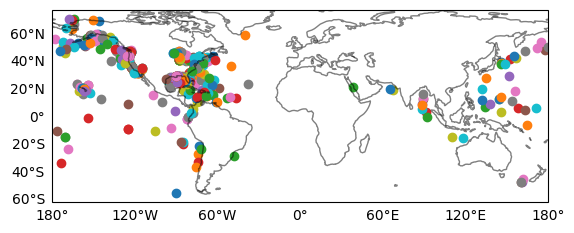

In [9]:
xbuoy.plot_stations(buoy_stations)

### Filter for California buoys

(<Figure size 640x480 with 1 Axes>, <GeoAxes: >)

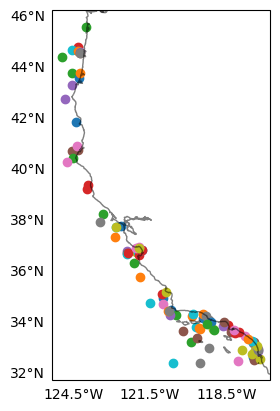

In [10]:
# Filter for California buoys using the new API
california_buoys = xbuoy.filter_by_region(
    buoy_stations, 
    lon_min=-125, 
    lon_max=-115, 
    lat_min=20, 
    lat_max=46
)
xbuoy.plot_stations(california_buoys)

### Query all available data for California buoys between 1998 and 2000

In [11]:
# Define years to retrieve data for
years = range(1998, 2000)

# Get list of California station IDs
station_list = california_buoys.station_id.values.tolist()

# Fetch historical data using the new API
data = xbuoy.fetch_data(
    station_ids=station_list,
    years=years,
    sample_rate="D",  # Daily averages
    add_location=True
)

# Compute data coverage after fetching
data = xbuoy.compute_data_coverage(data, variable="WTMP")

Fetching station metadata:  30%|███       | 270/897 [00:01<00:05, 108.34station/s]/Users/anthonymeza/miniforge3/envs/xbuoy/lib/python3.10/site-packages/ndbc_api/api/parsers/http/station_historical.py:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  p_tag = soup.find('p', text=cls.LIST_IDENTIFIER)
/Users/anthonymeza/miniforge3/envs/xbuoy/lib/python3.10/site-packages/ndbc_api/api/parsers/http/station_historical.py:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  p_tag = soup.find('p', text=cls.LIST_IDENTIFIER)
/Users/anthonymeza/miniforge3/envs/xbuoy/lib/python3.10/site-packages/ndbc_api/api/parsers/http/station_historical.py:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  p_tag = soup.find('p', text=cls.LIST_IDENTIFIER)
/Users/anthonymeza/miniforge3/envs/xbuoy/lib/python3.10/site-packages/ndbc_api/api/parsers/http/sta

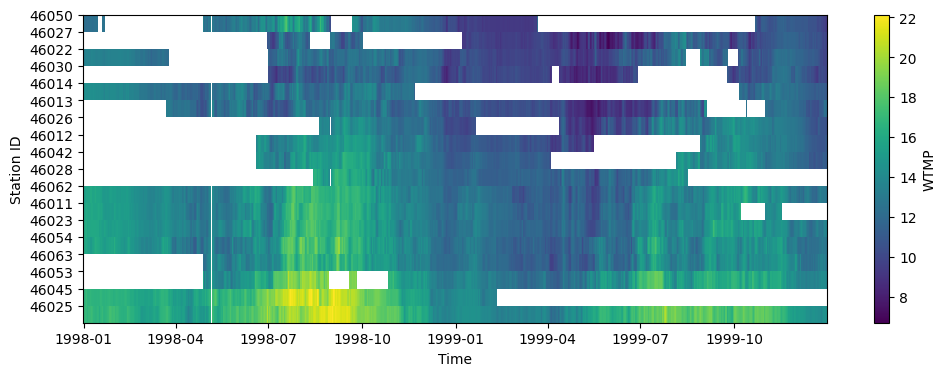

In [16]:
sorted_data = data.sortby("latitude")

station_idx = np.arange(len(sorted_data["WTMP"].station_id))

plt.figure(figsize=(12, 4))
plt.pcolormesh(sorted_data["WTMP"].time, station_idx, sorted_data["WTMP"], cmap="viridis", shading="auto")
plt.yticks(station_idx + 0.5, sorted_data["WTMP"].station_id.values)
plt.xlabel("Time"); plt.ylabel("Station ID"); plt.colorbar(label="WTMP")
plt.show()

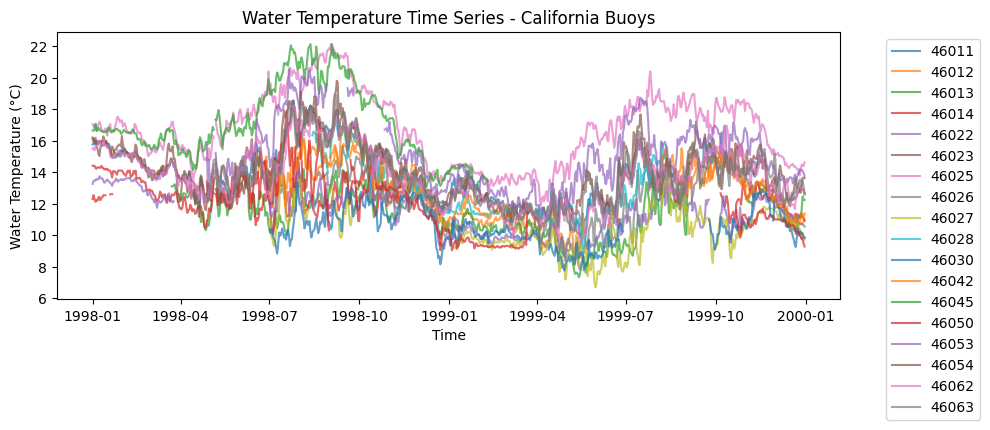

In [25]:
# Plot water temperature time series for all California buoys
fig, ax = plt.subplots(figsize=(10, 4))
for station in data["station_id"]:
    ax.plot(data.time, data.WTMP.sel(station_id=station), label=station.values, alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Time")
ax.set_ylabel("Water Temperature (°C)")
ax.set_title("Water Temperature Time Series - California Buoys")
plt.tight_layout()

Text(0.5, 1.0, 'Water Temperature Data Coverage - California Buoys')

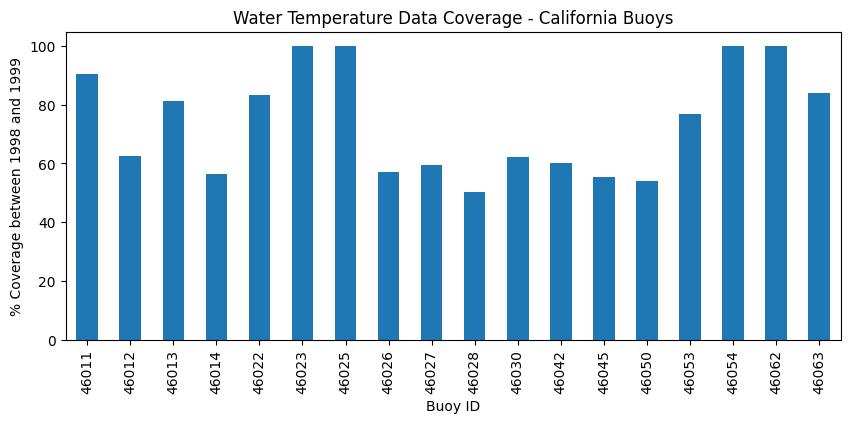

In [26]:
# Plot data coverage for each station
fig, ax = plt.subplots(figsize=(10, 4))
data["WTMP_coverage"].to_series().plot.bar(ax=ax)
ax.set_xlabel("Buoy ID")
ax.set_ylabel(f"% Coverage between {years[0]} and {years[-1]}")
ax.set_title("Water Temperature Data Coverage - California Buoys")

In [ ]:
# Save the dataset to NetCDF file
# data.to_netcdf("NDBC_California_Daily.nc")
# print(f"Saved data for {len(data.station_id)} California buoys to NDBC_California_Daily.nc")